In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


 <h1><center><img src= "https://images.wondershare.com/recoverit/article/2020/08/unhide-songs-on-spotify-1.jpg" alt ="Spotify" style='width: 550px;'></center></h1>

This is an exploratory data analysis of the "**Spotify Top Hits (2000-2019)**" dataset by Mark Koverha.

* **[Introduction](#introduction)**
    - [Variables](#subsection-intro)
* **[1. Importing packages](#section-one)**
* **[2. Reading the data](#section-two)**
* **[3. Review of the data](#section-three)**
    - [a. Descriptive statistics](#subsection-a)
    - [b. Data cleaning and transformation](#subsection-b)
* **[4. Analysis of data](#section-four)**
    - [a. Songs by year](#subsection-4a)
    - [b. Music genre](#subsection-4b)
    - [c. Top artists](#subsection-4c)
    - [d. Music duration](#subsection-4d)
    - [e. Variables correlation](#subsection-4e)
* **[5. Conclusions](#section-five)**

    

<a id="introduction"></a>

# <h1><center>Introduction</center></h1>

The purpose of this notebook is to study the main characteristics of Spotify's most popular songs and understand how they relate to each other according to their features, as well inserting some historical context for the analysis.

The main reason for this analysis is for study purposes and practice using Python programming language.

----

<a id="#subsection-intro"></a>

## Variables

According to the Spotify website, all of their songs are given a score in each of the following categories (taken from the Spotify API documentation, https://developer.spotify.com/documentation/web-api/reference/):

* **Mood**: Danceability, Valence, Energy, Tempo
* **Properties**: Loudness, Speechiness, Instrumentalness
* **Context**: Liveness, Acousticness


The dataset contains the variables:

### General informations

* **artist**: Name of the Artist.

* **song**: Name of the Track.

* **genre**: Genre of the track.

* **duration_ms**: Duration of the track in milliseconds.

* **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

* **year**: Release Year of the track.

* **popularity**: The higher the value the more popular the song is.

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

### Mood

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### Properties 

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Context

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

___

## 1. Importing packages

<a id="section-one"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

---

## 2. Reading the data

<a id="section-two"></a>

In [3]:
# Define the file path as a variable
file_path = '/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv'

# Import and read the dataset
top_songs = pd.read_csv(file_path)

---

## 3. Review of the data

<a id="section-three"></a>


### a. Descriptive statistics

<a id="subsection-a"></a>

Let's take a first look at the dataset, get to know the variables, how they're registered, get to know the formats, verify missing values and think about how we are going to explore them. Also, we need to check some basic descriptive statistics.

In [4]:
# Checking the first rows of data
top_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
# Basic descriptive statistics
top_songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Most of the data seems to be okay about the descriptive statistics. Although, there's just a few things to check, for example, the minimun observation of the "year" is 1998 and the maximum is 2020, which is weird because the database range should goes between 2000 and 2019.

We will do something about it in the next step!

### b. Data cleaning and transformation

<a id="subsection-b"></a>


One of the important first steps when doing the "data cleaning" is to check if there's any missing value. We need to understand if the missing values wasn't recorded or if it doesn't really exist for that variable.

In [6]:
# Collecting the total number of observations in the database (as calculated above)
total_rows = len(top_songs)
print('Total of observations:', total_rows)

Total of observations: 2000


In [7]:
# Getting the number of missing values
missing_values = top_songs.isnull().sum()
total_missing = missing_values.sum()

# Calculating the proportion between total missing values and total observations of the data
proportion_missing_values = (total_missing/total_rows)*100

print(missing_values)
print('-- Proportion of missing values:', proportion_missing_values)

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64
-- Proportion of missing values: 0.0


In [8]:
# Checking the variables format
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


There's no missing values in our dataset and all the columns data types seems to be alright too!

### **But...**

Just to make it easier to read the data, I will convert the column "*duration_ms*" (miliseconds) to seconds. To do that, I could use two methods with the same outputs: 
- **A)** Creating a new column using an existing column and writing a simple division operation over it; 
- **B)** Creating a new column, a new function and then using the "*.apply*" (it's more complicated for our goal here, but it's nice to practice some Python functions/lambda)

In [9]:
## A. FIRST METHOD ##

#top_songs['duration_sec'] = top_songs['duration_ms']/1000
#top_songs


## B. SECOND METHOD ##

# Creating a function that converts milliseconds to seconds
def convert_ms_to_sec(ms):
    return ms/1000

# Creating a new column in the dataframe, using the apply function with lambda
top_songs['duration_sec'] = top_songs.apply(lambda ms: convert_ms_to_sec(ms['duration_ms']), axis=1)

In [10]:
# Converting the new column to 'int64' and checking for missing values in it
top_songs = top_songs.astype({"duration_sec": np.int64})
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Now let's go back to that "***year***" problem we talked about. As stated before:

> *Most of the data seems to be okay about the descriptive statistics. Although, there's just a few things to check, for example, the minimun observation of the "year" is 1998 and the maximum is 2020, which is weird because the database range should goes between 2000 and 2019.*

We need to check how many observations are out of the scope of our analysis. To do that, we are going to group the rows by year.

In [11]:
# Here we use:
## the "size()" that pulls up the unique groupby count 
## the "reset_index()" method that resets the name of the column I want it to be
## the "to_frame()" method that convert the GroupBy into a dataframe

songs_by_year = top_songs.groupby("year").size().to_frame(name = 'songs').reset_index()
songs_by_year

,year,songs
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


In [12]:
# Calculating the average of observations by year
print("Average of songs by year:",songs_by_year['songs'].mean(axis = 0))

Average of songs by year: 86.95652173913044


As we can see above, the data has:

- **1** song from **1998**;
- **38** songs from **1999**; 
- **3** songs from **2020**.

By calculating the average of songs per year, the number of songs released in 1998, 1999 and 2020 are way below. So, considering the dimension of those quantities and to keep the scope of the analysis as defined by the creator of the dataset, we will drop those observations.

In [13]:
# Droping the 1998, 1999 and 2020 observations
top_songs = top_songs[(top_songs.year >= 2000) & (top_songs.year <= 2019)]

# Checking if the "year" is in the right range
top_songs.groupby("year")["song"].count()

year
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
Name: song, dtype: int64

## 4. Analysis of data

<a id="section-four"></a>


After checking out if our data is in perfect condition to go through an analysis, we can start making some plots and begin to visualize some characteristics of the data, seeking for some patterns.

### a. Songs by year

<a id="subsection-4a"></a>

It is important to study the popularity of music over the years, given that we have a wide variety of new artists, new ways of disseminating art, technological innovations that change the accessibility of music and also the direction of the music industry. When we study the music of cultures this can gives us huge clues into what life and society was like, and how people felt about it at the time.

Although this data comes from the Spotify platform, which has only recently existed, the popularity of old songs today reflects how the track was received at the time and how it could maintain its legacy.

Therefore, it is interesting to observe the distribution of popular songs over the years in our dataset and verify which years were more or less prominent in the musical environment and try to seek a minimal explanation for that, using some of the features of the songs.

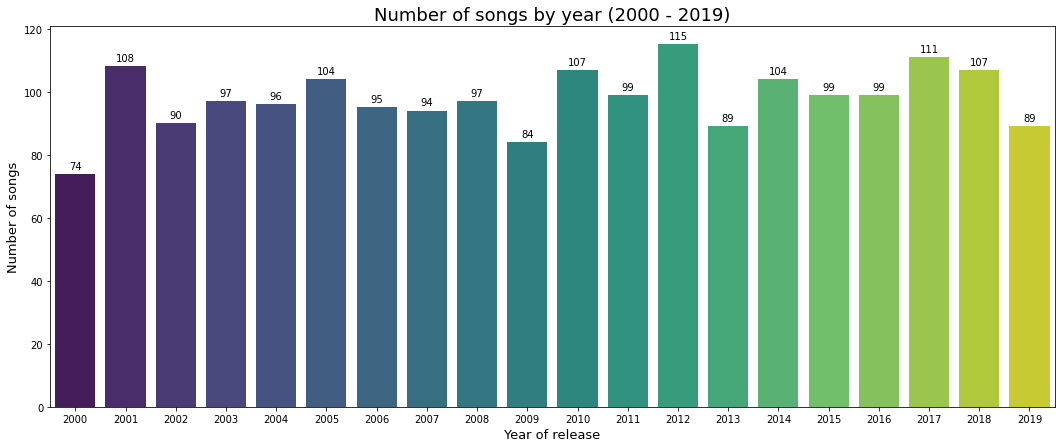

In [14]:
# Creating again a dataframe of songs by year, this time without 1998, 1999 and 2020
songs_by_year = top_songs.groupby("year").size().to_frame(name = 'songs').reset_index()

# plotting a bar chart
plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'year', y = 'songs', data = songs_by_year, palette = 'viridis')

# Iterrating over the bars one-by-one to create the value labels
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
      ## x-coordinate: bar.get_x() + bar.get_width() / 2
      ## y-coordinate: bar.get_height()
      ## decimals of annotation: '.0f'
      ## free space to be left to make graph pleasing: (0, 8)
      ## ha and va stand for the horizontal and vertical alignment

        plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    

# naming the x-axis and the y-axis
plt.xlabel('Year of release', size = 13)
plt.ylabel('Number of songs', size = 13)
  
# title of the graph
plt.title('Number of songs by year (2000 - 2019)', size = 18)
  
# function to show the plot
plt.show()

We can conclude that, from 2000 to 2019:

The highests number of hit songs were in the year of:

* **2012** (115 top hits); 
* **2017** (111 top hits); 
* **2001** (108 top hits).

On the other side, thee lowest numbers of hit songs were in the year of:

* **2000** (74 top hits);
* **2009** (84 top hits); 
* **2013** and **2019** (89 top hits each)

In [15]:
#pd.set_option('display.max_rows', None)
#pd.options.display.max_rows = 100

#display(top_songs[(top_songs.year == 2012)])

Let's see if we can find something especial about the categories (mood, properties and context) of the songs from the best and worst years. We will filter the data in two groups and make a violin chart.

The violin chart will help us to visualize if we are dealing with some multimodal or uniform data distribution.

In [16]:
# Creating a new filtered datafram containing only the top and bottom years of hits

top_down_features = top_songs[(top_songs.year == 2012) |
                              (top_songs.year == 2017) |
                              (top_songs.year == 2001) |
                              (top_songs.year == 2000) |
                              (top_songs.year == 2009) |
                              (top_songs.year == 2013) |
                              (top_songs.year == 2019)]

# Creating a new column with a flag indicating if top or bottom year

# create a list of our conditions
conditions = [
    (top_down_features['year'] == 2012) | (top_down_features['year'] == 2017) | (top_down_features['year'] == 2001),
    (top_down_features['year'] == 2000) | (top_down_features['year'] == 2009) | (top_down_features['year'] == 2013) | (top_down_features['year'] == 2019)
    ]

# create a list of the values we want to assign for each condition
values = ['top_years', 'bottom_years']

# create a new column and use np.select to assign values to it using our lists as arguments
top_down_features['year_top_bottom_hits'] = np.select(conditions, values)

display(top_down_features[['year','year_top_bottom_hits']] \
        .groupby(['year', 'year_top_bottom_hits']) \
        .size().to_frame(name = 'songs').reset_index())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,year_top_bottom_hits,songs
0,2000,bottom_years,74
1,2001,top_years,108
2,2009,bottom_years,84
3,2012,top_years,115
4,2013,bottom_years,89
5,2017,top_years,111
6,2019,bottom_years,89


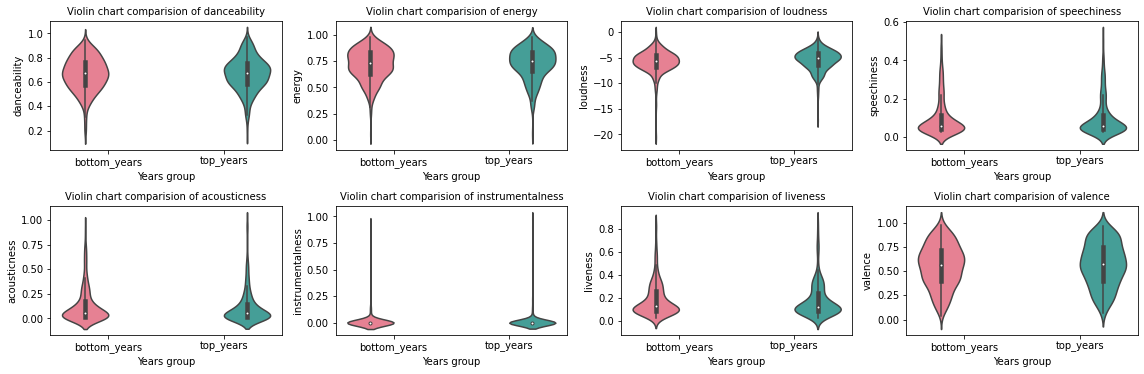

In [17]:
# Ploting the violin charts using subplots()

plt.subplots(figsize=(16, 10),sharey=True)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# danceability
# using subplot function and creating plot one
ax1 = plt.subplot(4,4,1)  # row 1, column 2, count 1

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="danceability",              \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of danceability", loc="center",fontsize=10)

plt.xlabel("Years group")
plt.ylabel("danceability")
plt.legend([],[], frameon=False)
 
                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# energy
ax2 = plt.subplot(4, 4, 2)

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="energy",                    \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of energy", loc="center", fontsize=10)

plt.xlabel("Years group")
plt.ylabel("energy")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# loudness
ax3 = plt.subplot(4,4,3)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="loudness",                \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of loudness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("loudness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# speechiness
ax4 = plt.subplot(4, 4, 4)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="speechiness",             \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of speechiness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("speechiness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# acousticness
ax5 = plt.subplot(4, 4, 5)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="acousticness",            \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of acousticness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("acousticness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# instrumentalness
ax6 = plt.subplot(4, 4, 6)

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="instrumentalness",          \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of instrumentalness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("instrumentalness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# liveness
ax7 = plt.subplot(4, 4, 7)

sns.violinplot( x = "year_top_bottom_hits",   \
               y ="liveness",                 \
               data = top_down_features,      \
               hue = "year_top_bottom_hits",  \
               linewidth=1.5,                 \
               palette = "husl")

plt.title("Violin chart comparision of liveness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("liveness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# valence
ax8 = plt.subplot(4, 4, 8)

sns.violinplot( x = "year_top_bottom_hits",           \
               y ="valence",data = top_down_features, \
               hue = "year_top_bottom_hits",          \
               linewidth=1.5,                         \
               palette = "husl")

plt.title("Violin chart comparision of valence", loc="center", fontsize=10)

plt.xlabel("Years group")
plt.ylabel("valence")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

The characteristics of the songs of the two groups have very similar patterns. Most have a **high average of danceability, energy and loudness**, as opposed to **low concentration in speechiness, acousticness, instrumentalness and liveness**.

So, there is a certain pattern for the songs to be successful in general, which is being more lively, intense and appropriate for party occasions or just simply to dance and cheer up.

### b. Music genre

<a id="subsection-4b"></a>

Genres are important because it dictate what the audience expects from it and often tells a history of that music's development. Although a lot of music doesn't fit in boxes so easily, it is a great tool for a number of different musical business purposes. Because of that, you're able to give some musical points of reference in the form of a genre description, whether you're the manager of a band and you're trying to look for specific contracts or places that have the specific audience that the band's music genre appeals to. Or even create a radio segmentation for an audience that likes a specific genre and meet a market demand, for example.

There's also the cultural and historical argument. As Heather McDonald stated in the article "***What Is a Music Genre?***":
> *Subgenres tend to have a culture all their own. Fans of a particular subgenre of music may tend to flock to the same kinds of venues and same kinds of shops, listen to the same radio stations, watch the same movies, and use the same websites. This kind of information is invaluable when it comes to promoting and marketing music and putting together live shows.* ([Source](https://www.thebalancecareers.com/music-genre-what-is-it-and-why-does-it-matter-2460500))

All of that ilustrate a little why it's relevant the analysis of music genre in this dataset. That meet one of the main purpose of data analysis, which is to help society to make decisions.

In [18]:
# First let's group and count all music genres in the dataset and get the top 10
songs_by_genre = top_songs \
                    .groupby("genre") \
                    .size().to_frame(name = 'songs').reset_index() \
                    .sort_values(['songs'],ascending=False).head(10)

songs_by_genre

,genre,songs
30,pop,416
19,"hip hop, pop",275
21,"hip hop, pop, R&B",240
31,"pop, Dance/Electronic",219
33,"pop, R&B",173
14,hip hop,121
20,"hip hop, pop, Dance/Electronic",78
44,rock,57
53,"rock, pop",41
0,Dance/Electronic,40


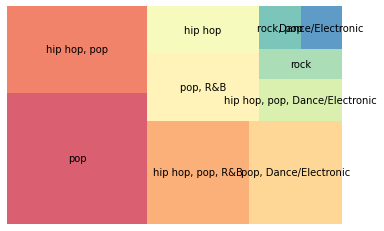

In [19]:
import squarify    # pip install squarify (algorithm for treemap)


# plot it
squarify.plot(sizes=songs_by_genre['songs'], label=songs_by_genre['genre'], alpha=.8 ,color=sns.color_palette("Spectral", len(songs_by_genre)) )
plt.axis('off')
plt.show()

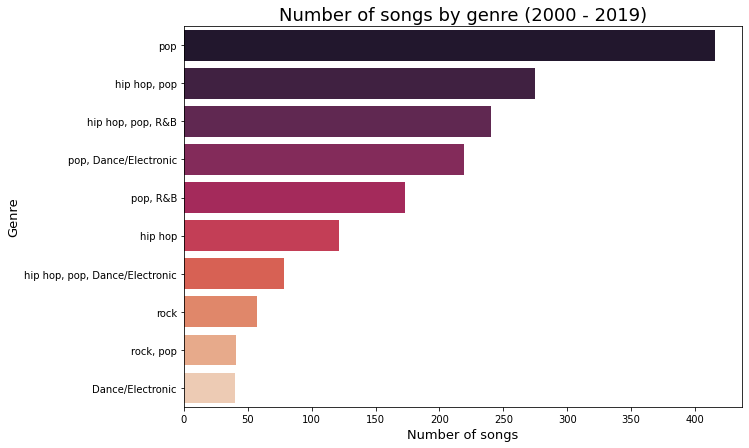

In [20]:
# plotting a bar chart
plt.figure(figsize = (10,7))
plots = sns.barplot(x = 'songs', y = 'genre', data = songs_by_genre, palette = 'rocket')  

# naming the x-axis and the y-axis
plt.xlabel('Number of songs', size = 13)
plt.ylabel('Genre', size = 13)
  
# title of the graph
plt.title('Number of songs by genre (2000 - 2019)', size = 18)
  
# function to show the plot
plt.show()

It's interesting to notice that almost every category of the TOP 10 has some "pop" in it. But how does the different combinations of pop with others styles behave in popularity? We'll see.

In [21]:
# Creating a dataframe with the number of each genre per year (and convertig 'year' as time variable)
songs_by_genre_year = top_songs[['year','genre']] \
                    .groupby(['year', 'genre']) \
                    .size().to_frame(name = 'songs').reset_index()

songs_by_genre_year['year'] = songs_by_genre_year['year'].astype(int)


# Inner join to limit the genres to ones on the top 10
songs_by_genre_year = pd.merge(songs_by_genre_year, songs_by_genre['genre'], \
                               on = 'genre', \
                               how='inner')
songs_by_genre_year

,year,genre,songs
0,2000,Dance/Electronic,1
1,2001,Dance/Electronic,5
2,2002,Dance/Electronic,1
3,2003,Dance/Electronic,1
4,2004,Dance/Electronic,2
...,...,...,...
176,2015,"hip hop, pop, Dance/Electronic",5
177,2016,"hip hop, pop, Dance/Electronic",11
178,2017,"hip hop, pop, Dance/Electronic",6
179,2018,"hip hop, pop, Dance/Electronic",5


To visualize how the data of the TOP 5 musical genres behave over time, we will use a "[*polynomial fit*](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)" procedure from NumPy, which will add a trend line to the graphs.

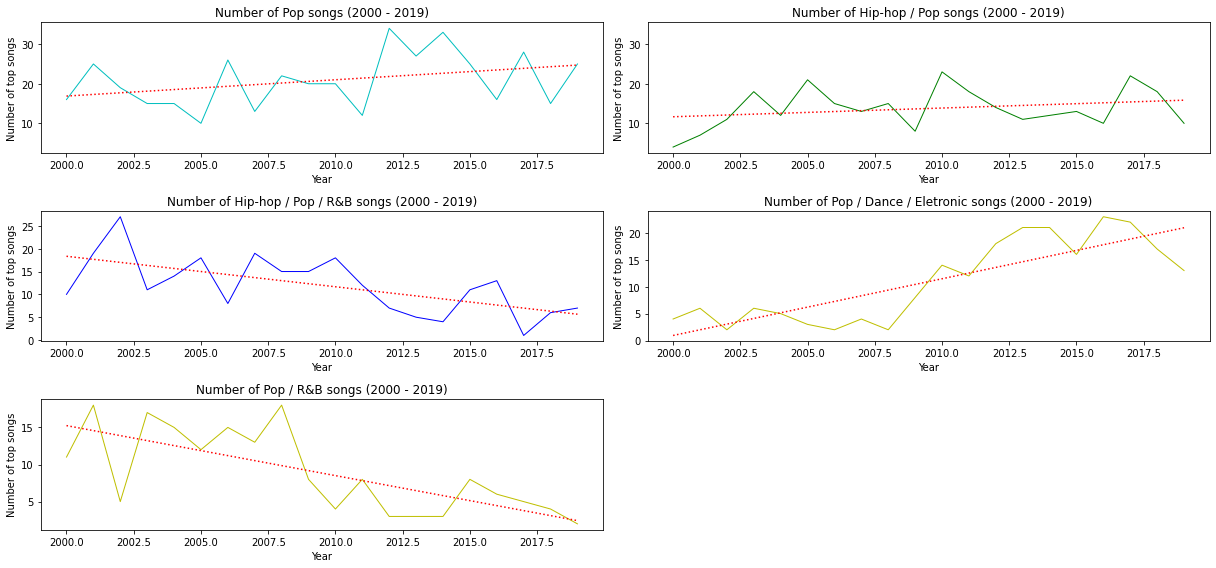

In [22]:
genre_pop = songs_by_genre_year[(songs_by_genre_year.genre == 'pop')]
genre_hiphop_pop = songs_by_genre_year[(songs_by_genre_year.genre == 'hip hop, pop')]
genre_hipop_pop_rb = songs_by_genre_year[(songs_by_genre_year.genre == 'hip hop, pop, R&B')]
genre_pop_elec = songs_by_genre_year[(songs_by_genre_year.genre == 'pop, Dance/Electronic')]
genre_pop_rb = songs_by_genre_year[(songs_by_genre_year.genre == 'pop, R&B')]


plt.subplots(figsize=(17, 8),sharey=True)


# using subplot function and creating plot one
ax1 = plt.subplot(3,2,1)  # row 1, column 2, count 1

z = np.polyfit(genre_pop['year'], genre_pop['songs'], 1) #Polynomial fit
p = np.poly1d(z)

plt.plot(genre_pop['year'], genre_pop['songs'], 'c', linewidth=1)
plt.plot(genre_pop['year'],p(genre_pop['year']),"r:")
plt.title('Number of Pop songs (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Number of top songs')
 

ax2 = plt.subplot(3, 2, 2)

z = np.polyfit(genre_hiphop_pop['year'], genre_hiphop_pop['songs'], 1) #Polynomial fit
p = np.poly1d(z)

plt.plot(genre_hiphop_pop['year'], genre_hiphop_pop['songs'], 'g', linewidth=1)
plt.plot(genre_hiphop_pop['year'],p(genre_hiphop_pop['year']),"r:")
plt.title('Number of Hip-hop / Pop songs (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Number of top songs')

ax1.sharey(ax2)

ax3 = plt.subplot(3,2,3)

z = np.polyfit(genre_hipop_pop_rb['year'], genre_hipop_pop_rb['songs'], 1) #Polynomial fit
p = np.poly1d(z)

plt.plot(genre_hipop_pop_rb['year'], genre_hipop_pop_rb['songs'], 'b', linewidth=1)
plt.plot(genre_hipop_pop_rb['year'],p(genre_hipop_pop_rb['year']),"r:")
plt.title('Number of Hip-hop / Pop / R&B songs (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Number of top songs')

#ax1.sharey(ax3)

ax4 = plt.subplot(3, 2, 4)

z = np.polyfit(genre_pop_elec['year'], genre_pop_elec['songs'], 1) #Polynomial fit
p = np.poly1d(z)

plt.plot(genre_pop_elec['year'], genre_pop_elec['songs'], 'y', linewidth=1)
plt.plot(genre_pop_elec['year'],p(genre_pop_elec['year']),"r:")
plt.title('Number of Pop / Dance / Eletronic songs (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Number of top songs')

#ax1.sharey(ax4)

ax4 = plt.subplot(3, 2, 5)

z = np.polyfit(genre_pop_rb['year'], genre_pop_rb['songs'], 1) #Polynomial fit
p = np.poly1d(z)

plt.plot(genre_pop_rb['year'], genre_pop_rb['songs'], 'y', linewidth=1)
plt.plot(genre_pop_rb['year'],p(genre_pop_rb['year']),"r:")
plt.title('Number of Pop / R&B songs (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Number of top songs')



# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

As stated earlier, the behavior of the popularity of music and it's musical genres can say a lot about the history of society, new technologies and emerging demands in the musical environment.

As the chart shows, the **Pop** and **Hip-hop** genres have maintained **relative stability in terms of number of hit songs over time**. On the other hand, **when these two genres are added by the R&B style, it loses some ground**.

The most interesting observation is about the **Pop style mixed with dance and eletronic music**, which had a significant increase in popularity between the analyzed period, mainly after 2007. As the journalist Joe Muggs state:

> *As 2007 started dubstep was barely out of its own niche, still really a scene of a couple of hundred mates, but by the end of that year, Caspa & Rusko's fabriclive mix had sent it supernova. By 2009 there were top 10 hits in the UK and arena shows across the USA and it kept growing exponentially until in 2012 [...]* ([Source](https://mixmag.net/feature/2007-2017-might-just-be-the-greatest-decade-in-dance-music-history/2))

Also, we can see that everytime R&B appears, the chart goes down over time. It seems that the style had it's golden age at the 90s and 00s but it's giving space to other music genres at 2010s. Some ask: "is R&B dead?"

The truth is that R&B was wildly popular in mainstream music in the early 00’s. To some, that was the last time this was so. Nearing 2010, several pioneers of R&B transitioned to other genres for a while, including dance music, and a version of Pop that drew from R&B and Hip Hop. Think Usher’s DJ’s Got Us Falling In Love Again and Chris Brown’s Look At Me Now / Beautiful People. ([Source](https://thebluesproject.co/2019/08/rnb-evolution-and-state-of-play-today/))

Others like Carl Chery think that: 

> *R&B isn’t dead. It’s going through an identity crisis. The current definition of the genre is either too restrictive or too fluid, and mislabeling by record labels (plus some artists’ reluctance to be identified as R&B singers) has led to the perception that it isn’t as successful and profitable as it actually is.* ([Source](https://www.complex.com/music/2020/11/r-and-b-isnt-dead))

### c. Top artists

<a id="subsection-4c"></a>

Obsvously, after we study the number of hits and it's genres, we have to see who are the artists behind them! In the music industry there's a phenomenon called "one-hit wonders", which is "*a musical artist who is successful with one hit song, but without a comparable subsequent hit*" (Wikipedia definition).

But some musicians can mantain a certain stability in popularity, releasing tons of hit songs and becoming living icons. In this step we are going to discover who are those in the new millenium.

In [23]:
# First let's get the top artists by the number of successfull hits
songs_by_artist = top_songs.groupby('artist', as_index = False)['song'] \
                                .count().sort_values(['song'],ascending=False)

# Second let's get the top artists by the 'popularity' variable available in the dataset, which differenciate the level of popularity of each song
popularity_by_artist = top_songs.groupby('artist', as_index = False)['popularity'] \
                                .sum().sort_values(['popularity'],ascending=False)

# Inner join to dataframe with number of hit songs and popularity
pop_and_hits_by_artist = pd.merge(popularity_by_artist, \
                                  songs_by_artist,      \
                                  on = 'artist',        \
                                  how='outer')

pop_and_hits_by_artist['song'] = pop_and_hits_by_artist['song'].astype('Int64')
pop_and_hits_by_artist['popularity'] = pop_and_hits_by_artist['popularity'].astype('Int64')

#pop_and_hits_by_artist.set_index('artist',inplace=True)

pop_and_hits_by_artist = pop_and_hits_by_artist.head(10)
pop_and_hits_by_artist

,artist,popularity,song
0,Rihanna,1803,25
1,Eminem,1519,21
2,Drake,1424,23
3,Calvin Harris,1356,20
4,David Guetta,1185,18
5,Britney Spears,1140,18
6,Taylor Swift,1125,16
7,Chris Brown,1080,17
8,Kanye West,1049,17
9,Katy Perry,1033,16


Altough we have found those names to be placed at the top, we must state that some artists can mantain some popularity as time goes by and also not be an "one-hit wonder". That's explained for the fact that not all musicians release songs with the same frequency of time. Some can take years to release a new album, others can do it almost every year and be successfull in each one of them.

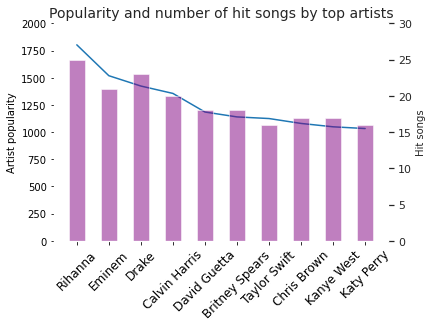

In [24]:
# Create figure and axis #1
fig, ax1 = plt.subplots()

sns.set(rc = {'figure.figsize':(12,6)})                                         # Set chart size

# plot line chart on axis #1
ax1.plot(pop_and_hits_by_artist.artist, pop_and_hits_by_artist.popularity)      # Variables 
ax1.set_ylabel('Artist popularity',fontsize=10)                               # Y-Axis label 1
ax1.set_ylim(0, 2000)                                                           # Limit of Y-Axis scale

plt.xticks(rotation=45, size = 12)                                              # Rotation and font size of X-Axis labels

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(pop_and_hits_by_artist.artist, pop_and_hits_by_artist.song, width=0.5, alpha=0.5, color='purple')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Hit songs',fontsize=10)
ax2.set_ylim(0, 30)

plt.title('Popularity and number of hit songs by top artists', size = 14)

plt.show()

As we can see, the popularity data is consistent with the number of hits that the artist released in the analyzed period, with Rihanna, Eminem and Drake being the biggest highlights.

As mentioned earlier, not all artists release music in the same time frame. Rihanna, for example, hasn't released any music for 6 years. Therefore, I would like to check the temporal distribution of these artist's hits to see if they released songs at close moments and contexts.

Text(0.5, 1.0, 'Number of hit songs by top 3 artist (2000 - 2019)')

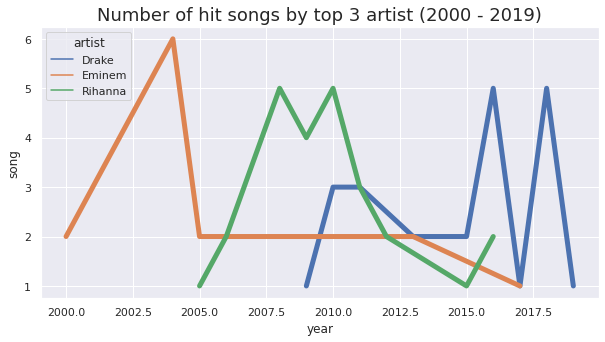

In [25]:
# Getting the dataframe grouped by the top 3 artists by year

top_3_artists = (top_songs[(top_songs.artist.isin(['Rihanna','Eminem','Drake']))]) \
                .groupby(['year','artist'], as_index = False)['song'] \
                .count().sort_values(['year'],ascending=False)


# Ploting a chart to visualize the number of hit songs by top 3 artist as times goes by

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='year', y='song', hue='artist', data=top_3_artists, linewidth=5)

plt.title('Number of hit songs by top 3 artist (2000 - 2019)', size = 18)

We can observe that, in fact, **Eminem** has a greater prominence between 2000 and 2005, reaching a peak of 6 hit songs in 2002, which some would consider as his peak after the release of his album "The Eminem Show".

Between 2007 and 2010, **Rihanna** stands out with two peaks of 5 hit songs, context of the release of successful albums such as "Good Girl Gone Bad" (2007) and "Loud" (2010). However, the there's a decreasing movement after this period and currently she has been without releasing new material since 2016, after the release of her album "Anti".

Finally, in 2015 **Drake** becomes the new highlight in the musical scenario, with the releases of the albums "Views" (2016) and "More Life" (2017).

### d. Music duration

<a id="subsection-4d"></a>

Although it seems irrelevant, the length of the songs is a very interesting subject to discuss, as it involves the way in which the audience receives the music, their level of attention, as well as the technological context of the time the track was released. Let's understand why!

First, we will create a scatterplot visualization. By using the Plotly Express interface, we are able to add the Ordinary Least Squares regression trendline to our scatterplot and seek for some pattern.

In [26]:
fig = px.scatter(top_songs, x='year', y='duration_sec', trendline='ols',
                 labels = {'duration_sec' : 'Music duration (sec)'},
                title = 'Top hits duration (2000-2019)')

fig.show()

In [27]:
comp_avg_duration_2000 = (top_songs[(top_songs.year == 2000)])["duration_sec"].mean(skipna = True)
comp_avg_duration_2019 = (top_songs[(top_songs.year == 2019)])["duration_sec"].mean(skipna = True)

print(' Average hit songs duration in 2000:', comp_avg_duration_2000, "\n",'Average hit songs duration in 2019:', comp_avg_duration_2019)

 Average hit songs duration in 2000: 249.44594594594594 
 Average hit songs duration in 2019: 196.2808988764045


In fact, **music seems to be getting shorter**!

Some research carried out by Dr Joe Bennett, a professor at Berklee College of Music in Boston, Massachusetts, and a team of researchers from Harvard University states:

> *“Songs that are reduced in time are more favourable largely due to listener preferences, Spotify algorithms and the rise of social media platforms such as TikTok”*

> "*Around the turn of the 2000s we saw a temporary rise in durations, with some very long songs being nominated for Brit Song of the Year awards  and then fall again over the next few years with a dramatic drop after 2017, which correlates approximately with the rise of TikTok*” ([Source](https://www.telegraph.co.uk/news/2022/02/07/hit-songs-getting-shorter-tiktok-generations-attention-span/))


But, it's important to notice that the trend for shorter singles means a full circle in history, as early pop and rock songs of the 1950s and 1960s also favoured brevity. As pop music started to emerge in the late 1940s, the length of a song were dependent of the technical storage capacity of the media that housed it. That's how the lenght of music is linked to technology!

For nowadays, the possible reason why music is shorter it's because:

 > "*[...] radio programmers and streaming services are both interested in “market share” and are looking to hang onto their audiences by discouraging them from switching channels, or track-skipping in the case of streaming services. One way they’re trying to achieve this is by playlisting songs that have the “boring” bits taken out. In other words, **artists are having to edit their songs down by cutting out introduction sections and simplifying choruses to maximise their playlisting and streaming potential**.*" ([Source](https://inews.co.uk/opinion/pop-songs-getting-shorter-about-more-than-attention-spans-1704396))

### e. Variables correlation

<a id="subsection-4e"></a>

The final analysis will be the Pearson correlation of the variables with each other, in order to verify possible behavioral links between one variable and another, giving some open space for future studies and modeling.

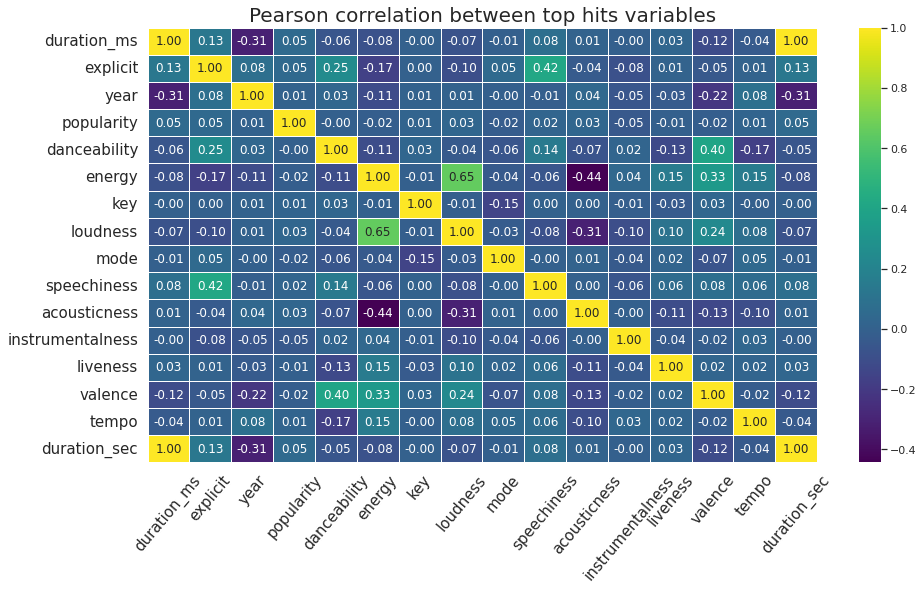

In [28]:
# Plotting a correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(top_songs.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Pearson correlation between top hits variables', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

Clearly the most striking point of the graph is the **positive correlation** between the songs features **loudness** and **energy**, which makes perfect sense, given that these two characteristics are very close by definition. Louder music tends to be more energetic and upbeat. Also, as stated before by the violin charts for the features, most of the top hits have a high average of danceability, energy and loudness, which are related to positive feelings. That possibly explain the positive correlation between **valence** and **popularity**

The same goes to the **negative correlation** between **loudness** and **acousticness**, given that acoustic music tends to be softer because of the instruments configuration.

The **speechiness** and **explicit** variables are also **positively correlated**, which probably means that the greater the number of words in the lyrics of a successful song, the greater the probability of "bad words".

Finally, the **negative correlation** between **music duration** and **year** complements the previous analysis, in which considered that music is getting shorter as time goes by.

---

### 5. Conclusions

<a id="section-five"></a>

In conclusion, here are highlights:

* The highests number of hit songs were in the year of **2012** (115 top hits), **2017** (111 top hits), **2001**. On the other side, the lowest numbers of hit songs were in the year of **2000** (74 top hits), **2009** (84 top hits), **2013** and **2019** (89 top hits each). Most have a high average of **danceability, energy** and **loudness**, as opposed to low concentration in speechiness, acousticness, instrumentalness and liveness.

* The **Pop** and **Hip-hop** genres have maintained relative stability in terms of number of hit songs over time. On the other hand, when these two genres are added by the **R&B** style, it loses some ground. Additionally, when Pop style meets with **dance and eletronic music**, there's a significant increase in popularity along the analyzed period, mainly after 2007.

* **Rihanna**, **Eminem** and **Drake** are the **top 3 most popular artists** in the dataset. But when we look at the time analysis of the hit songs released by each one of them, we can state that they had alternating peaks of popular tracks at diferent contexts of time along 2000 and 2019.

* There are some evidences that, in fact, **music lenght is getting shorter** over time.

* Some features are **positively correlated** with each other, like **loudness** and **energy** and also **valence** and **popularity**. It seems that popular songs usually are energetic and evoke positive feelings. The features **speechiness** and **explicit** have some **negative correlation**, problably because more extense lyrics increases the chances of explicit elements.